<a href="https://colab.research.google.com/github/naiilard/Simulasi-AR-1-/blob/main/simulasiAR(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Module yang digunakan

import numpy as np
import matplotlib.pyplot as plt

# Penentuan nilai parameter model yang stasioner

# Input nilai parameter
phi1 = float(input("Masukkan nilai phi1 (antara -1 dan 1): "))

# Kondisi stasioner
if -1 < phi1 < 1:
    print(f"Parameter phi1 = {phi1} memenuhi kondisi stasioner")
else:
    print("Parameter tidak memenuhi kondisi stasioner!")

# Inisialisasi simulasi model AR(2)

t_values = np.arange(20, 301, 1) # Rentang data dari 20 hingga 300 dengan step 1
iterasi = 1000
toleransi = 0.005 # Batas nilai MSE

# Inisialiasi untuk menyimpan nilai MSE
mse_phi1 = []

# Simulasi monte carlo
for t in t_values:

    # Inisialisasi untuk menyimpan estimasi phi1 dan phi2
    phi1_est = []
    phi2_est = []

    for _ in range(iterasi):

        # Proses membangkitkan data Y_t
        Y = np.zeros(t)
        epsilon = np.random.normal(0, 1, t)

        for tt in range(1, t):

            # Model AR(2)
            Y[tt] = phi1 * Y[tt-1] + epsilon[tt]

        # Estimasi parameter menggunakan Least Square
        X = Y[:-1].reshape(-1, 1)
        y = Y[1:]
        XtX_inv = np.linalg.inv(X.T @ X) # (X^T * X)^-1
        XtY = X.T @ y # (X^T * y)
        B = XtX_inv @ XtY

        # Menyimpan estimasi parameter
        phi1_est.append(B[0])

    # Mengitung nilai MSE phi1 dan phi2
    mse_phi1.append(np.mean((phi1 - np.array(phi1_est))**2))

# Menampilkan hasil estimasi parameter
print("Estimasi parameter phi1:")
for t, phi1_est in zip(t_values, phi1_est):
    print(f"t = {t}: phi1_est = {phi1_est}")

# Menampilkan nilai MSE
print("Nilai MSE untuk phi1:")
for t, mse in zip(t_values, mse_phi1):
    print(f"t = {t}: MSE = {mse}")

# Mencari nilai t_min yang memenuhi batas epsilon
t_min_phi1 = None

for i, mse1 in enumerate(mse_phi1):
    if mse1 <= toleransi:
        t_min_phi1 = t_values[i]
        break

# Menampilkan hasil t_min untuk phi1 dan phi2
if t_min_phi1 is not None:
    print(f"Nilai t minimum untuk phi1 yang memenuhi batas epsilon = {toleransi} adalah {t_min_phi1}.")
else:
    print(f"Tidak ada t minimum untuk phi1 yang memenuhi batas epsilon = {toleransi}.")

Masukkan nilai phi1 (antara -1 dan 1): 0.3
Parameter phi1 = 0.3 memenuhi kondisi stasioner
Estimasi parameter phi1:
t = 20: phi1_est = 0.240406278117876
t = 21: phi1_est = 0.33631400817990664
t = 22: phi1_est = 0.3039852191610797
t = 23: phi1_est = 0.2971789346678488
t = 24: phi1_est = 0.33261212859097866
t = 25: phi1_est = 0.21209272462373077
t = 26: phi1_est = 0.2838251269409689
t = 27: phi1_est = 0.28209669512021607
t = 28: phi1_est = 0.3152116767664738
t = 29: phi1_est = 0.2503835697694222
t = 30: phi1_est = 0.45801384915801036
t = 31: phi1_est = 0.21715153344039093
t = 32: phi1_est = 0.2972319751927714
t = 33: phi1_est = 0.35911715631138297
t = 34: phi1_est = 0.3452939365916825
t = 35: phi1_est = 0.3992420873168455
t = 36: phi1_est = 0.3057833750749711
t = 37: phi1_est = 0.3308810374097773
t = 38: phi1_est = 0.3120711131085112
t = 39: phi1_est = 0.31879315733176866
t = 40: phi1_est = 0.2683771118164231
t = 41: phi1_est = 0.2910260515630991
t = 42: phi1_est = 0.40800617869378225
t 

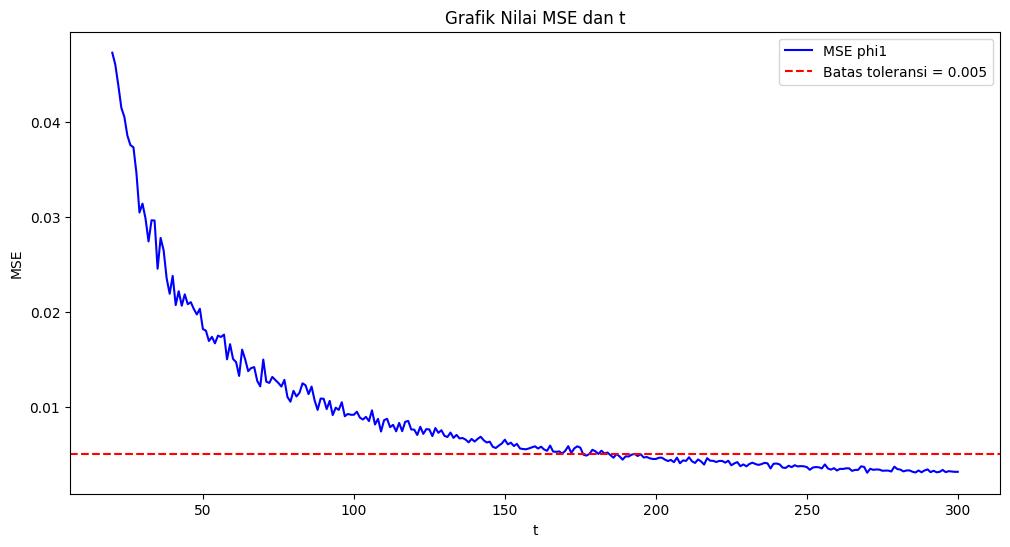

In [2]:
# Menampilkan grafik nilai MSE dan t
plt.figure(figsize=(12, 6))
plt.plot(t_values, mse_phi1, label='MSE phi1', color = 'blue')
plt.axhline(y = toleransi, color='red', linestyle='--', label=f'Batas toleransi = {toleransi}')
plt.xlabel('t')
plt.ylabel('MSE')
plt.title('Grafik Nilai MSE dan t')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Grafik Y_t')

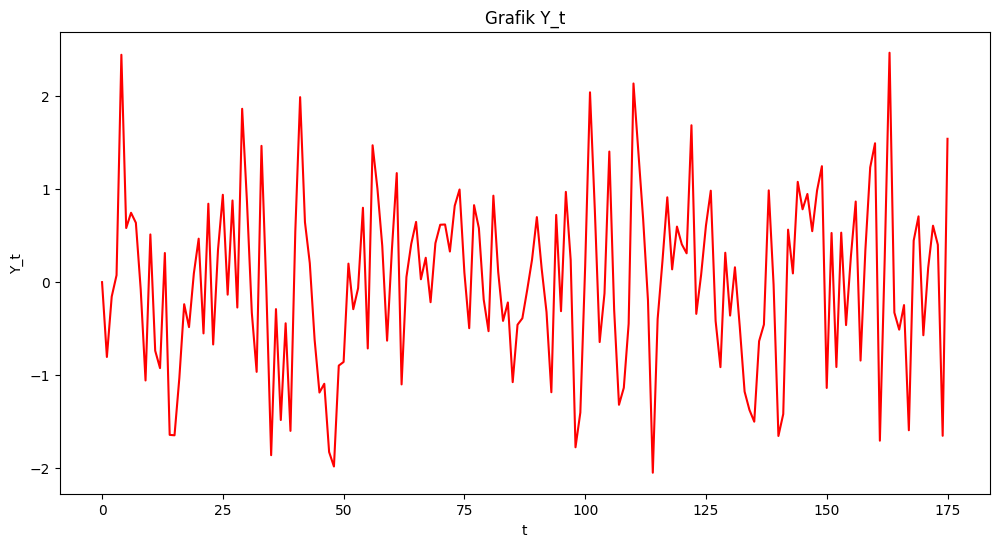

In [3]:
# Menampilkan Yt dengan t minimum
plt.figure(figsize=(12, 6))
plt.plot(range(t_min_phi1), Y[:t_min_phi1], label='Y_t', color = 'red')
plt.xlabel('t')
plt.ylabel('Y_t')
plt.title('Grafik Y_t')